<a href="https://colab.research.google.com/github/charline-coder101/yolov8_safetyhelmet/blob/main/hardhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyyaml

In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.2/757.2 kB 9.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 524, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'val', 'track', 'predict', 'benchmark', 'train', 'export'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'segment', 'classify', 'pose', 'obb'}
                MODE (required) is one of {'val', 'track', 'predict', 'benchmark', 'train', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import yaml

data = {
    'train': '/content/drive/MyDrive/css-data/train/images/',
    'val': '/content/drive/MyDrive/css-data/valid/images/',
    'test': '/content/drive/MyDrive/css-data/test/images/',
    'nc': 10,
    'names': ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest','Person', 'Safety Cone', 'Safety Vest', 'Machinery', 'Vehicle']
}

with open('safehat.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

In [6]:
model = YOLO('yolov8s.pt')
model.train(data='safehat.yaml', epochs=3)
model.val()

100%|██████████| 21.5M/21.5M [00:00<00:00, 271MB/s]


Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=safehat.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 44.3MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 163MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/css-data/train/labels... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [22:39<00:00,  1.92it/s]

train: WARNING ⚠️ /content/drive/MyDrive/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/css-data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/css-data/valid/labels... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:53<00:00,  2.15it/s]

val: New cache created: /content/drive/MyDrive/css-data/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.56G      1.326      2.098      1.442        346        640: 100%|██████████| 163/163 [01:42<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]

                   all        114        697      0.644      0.443      0.519      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      5.15G      1.169      1.389      1.329        275        640: 100%|██████████| 163/163 [01:30<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        114        697      0.662      0.542       0.58      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      4.51G      1.119      1.214      1.286        266        640: 100%|██████████| 163/163 [01:34<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        114        697      0.757      0.598      0.652      0.326



3 epochs completed in 0.085 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.32s/it]


                   all        114        697      0.757      0.598      0.652      0.327
               Hardhat        114         79      0.841      0.722      0.804      0.487
                  Mask        114         21      0.965       0.81      0.822      0.436
            NO-Hardhat        114         69      0.756      0.448      0.488      0.198
               NO-Mask        114         74      0.815      0.378      0.488      0.189
        NO-Safety Vest        114        106      0.724      0.496      0.612      0.263
                Person        114        166      0.641      0.693      0.692      0.343
           Safety Cone        114         44      0.707      0.568      0.631      0.332
           Safety Vest        114         41      0.665      0.679      0.659       0.33
             Machinery        114         55      0.665      0.782      0.777      0.357
               Vehicle        114         42      0.786      0.405      0.549      0.333
Speed: 1.3ms preproce

val: Scanning /content/drive/MyDrive/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]


                   all        114        697      0.757      0.597      0.652      0.326
               Hardhat        114         79      0.843      0.722      0.803      0.485
                  Mask        114         21      0.965       0.81      0.822      0.436
            NO-Hardhat        114         69      0.755      0.447       0.49      0.197
               NO-Mask        114         74      0.818      0.378      0.483      0.187
        NO-Safety Vest        114        106      0.724      0.495      0.612      0.266
                Person        114        166      0.636      0.693      0.694      0.342
           Safety Cone        114         44       0.69      0.568      0.623      0.327
           Safety Vest        114         41       0.68      0.674      0.661      0.333
             Machinery        114         55      0.668      0.782      0.777      0.357
               Vehicle        114         42      0.792      0.405      0.549      0.329
Speed: 1.3ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d35a991dae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

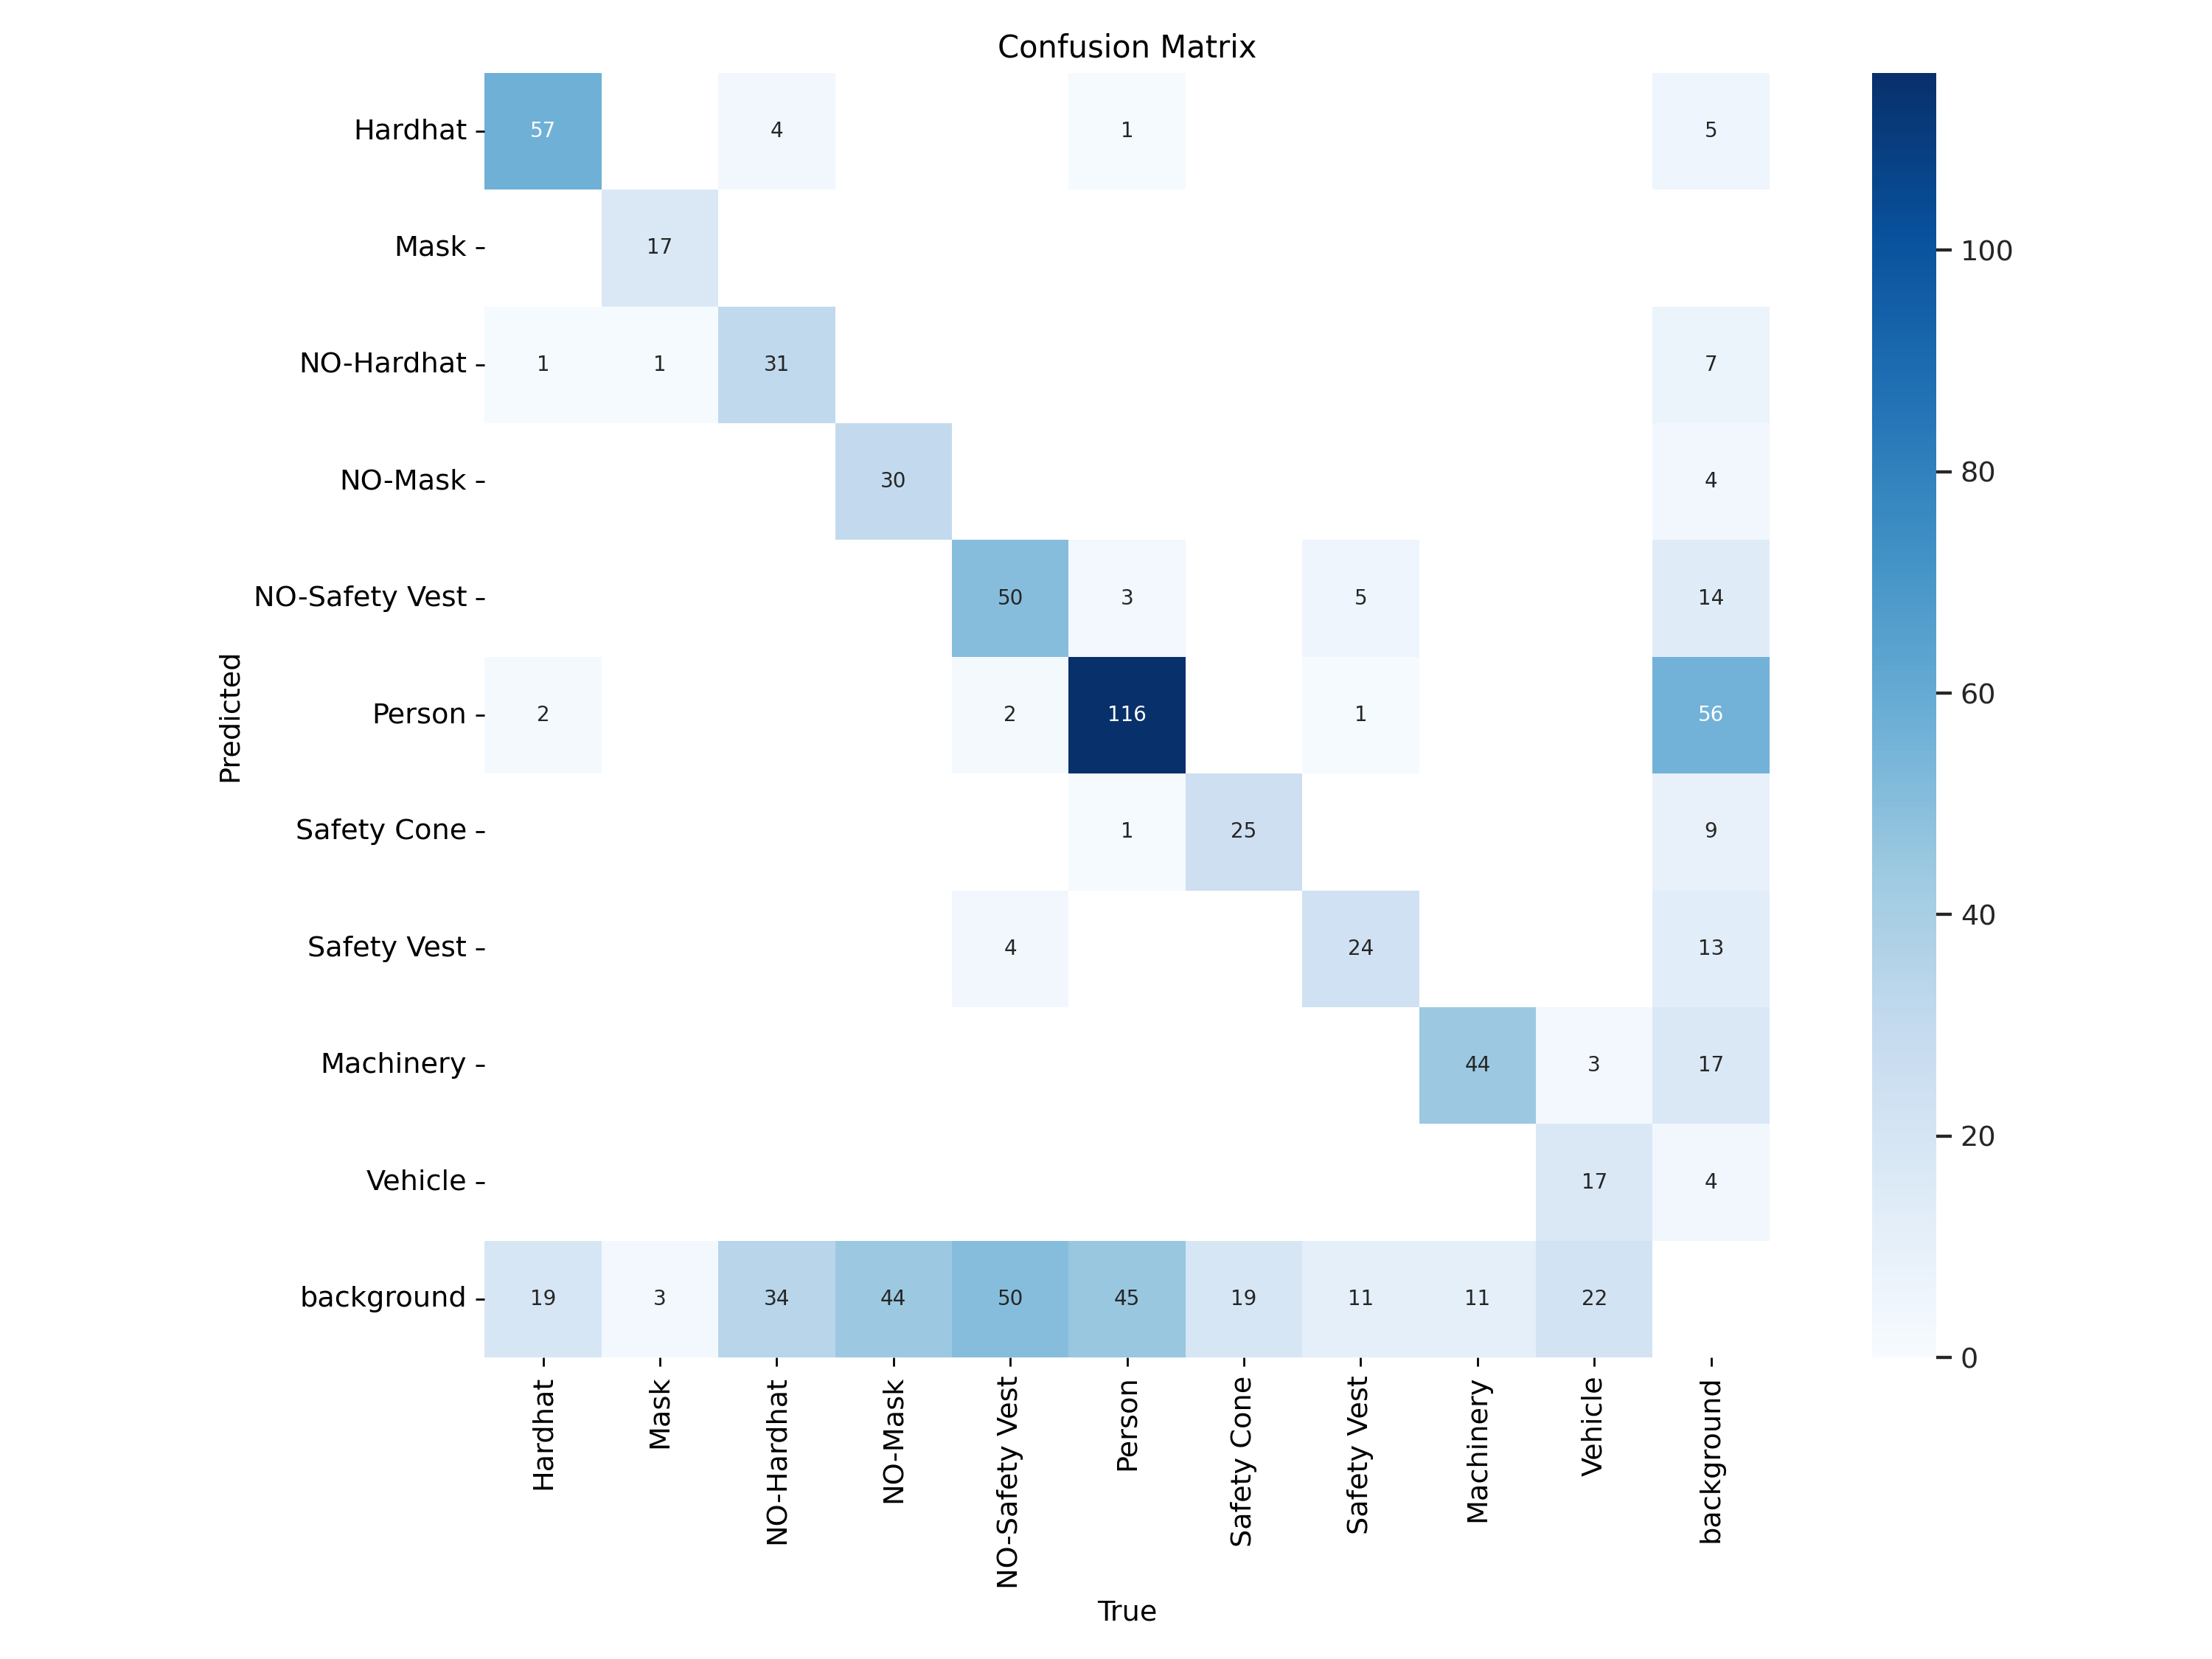

In [12]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

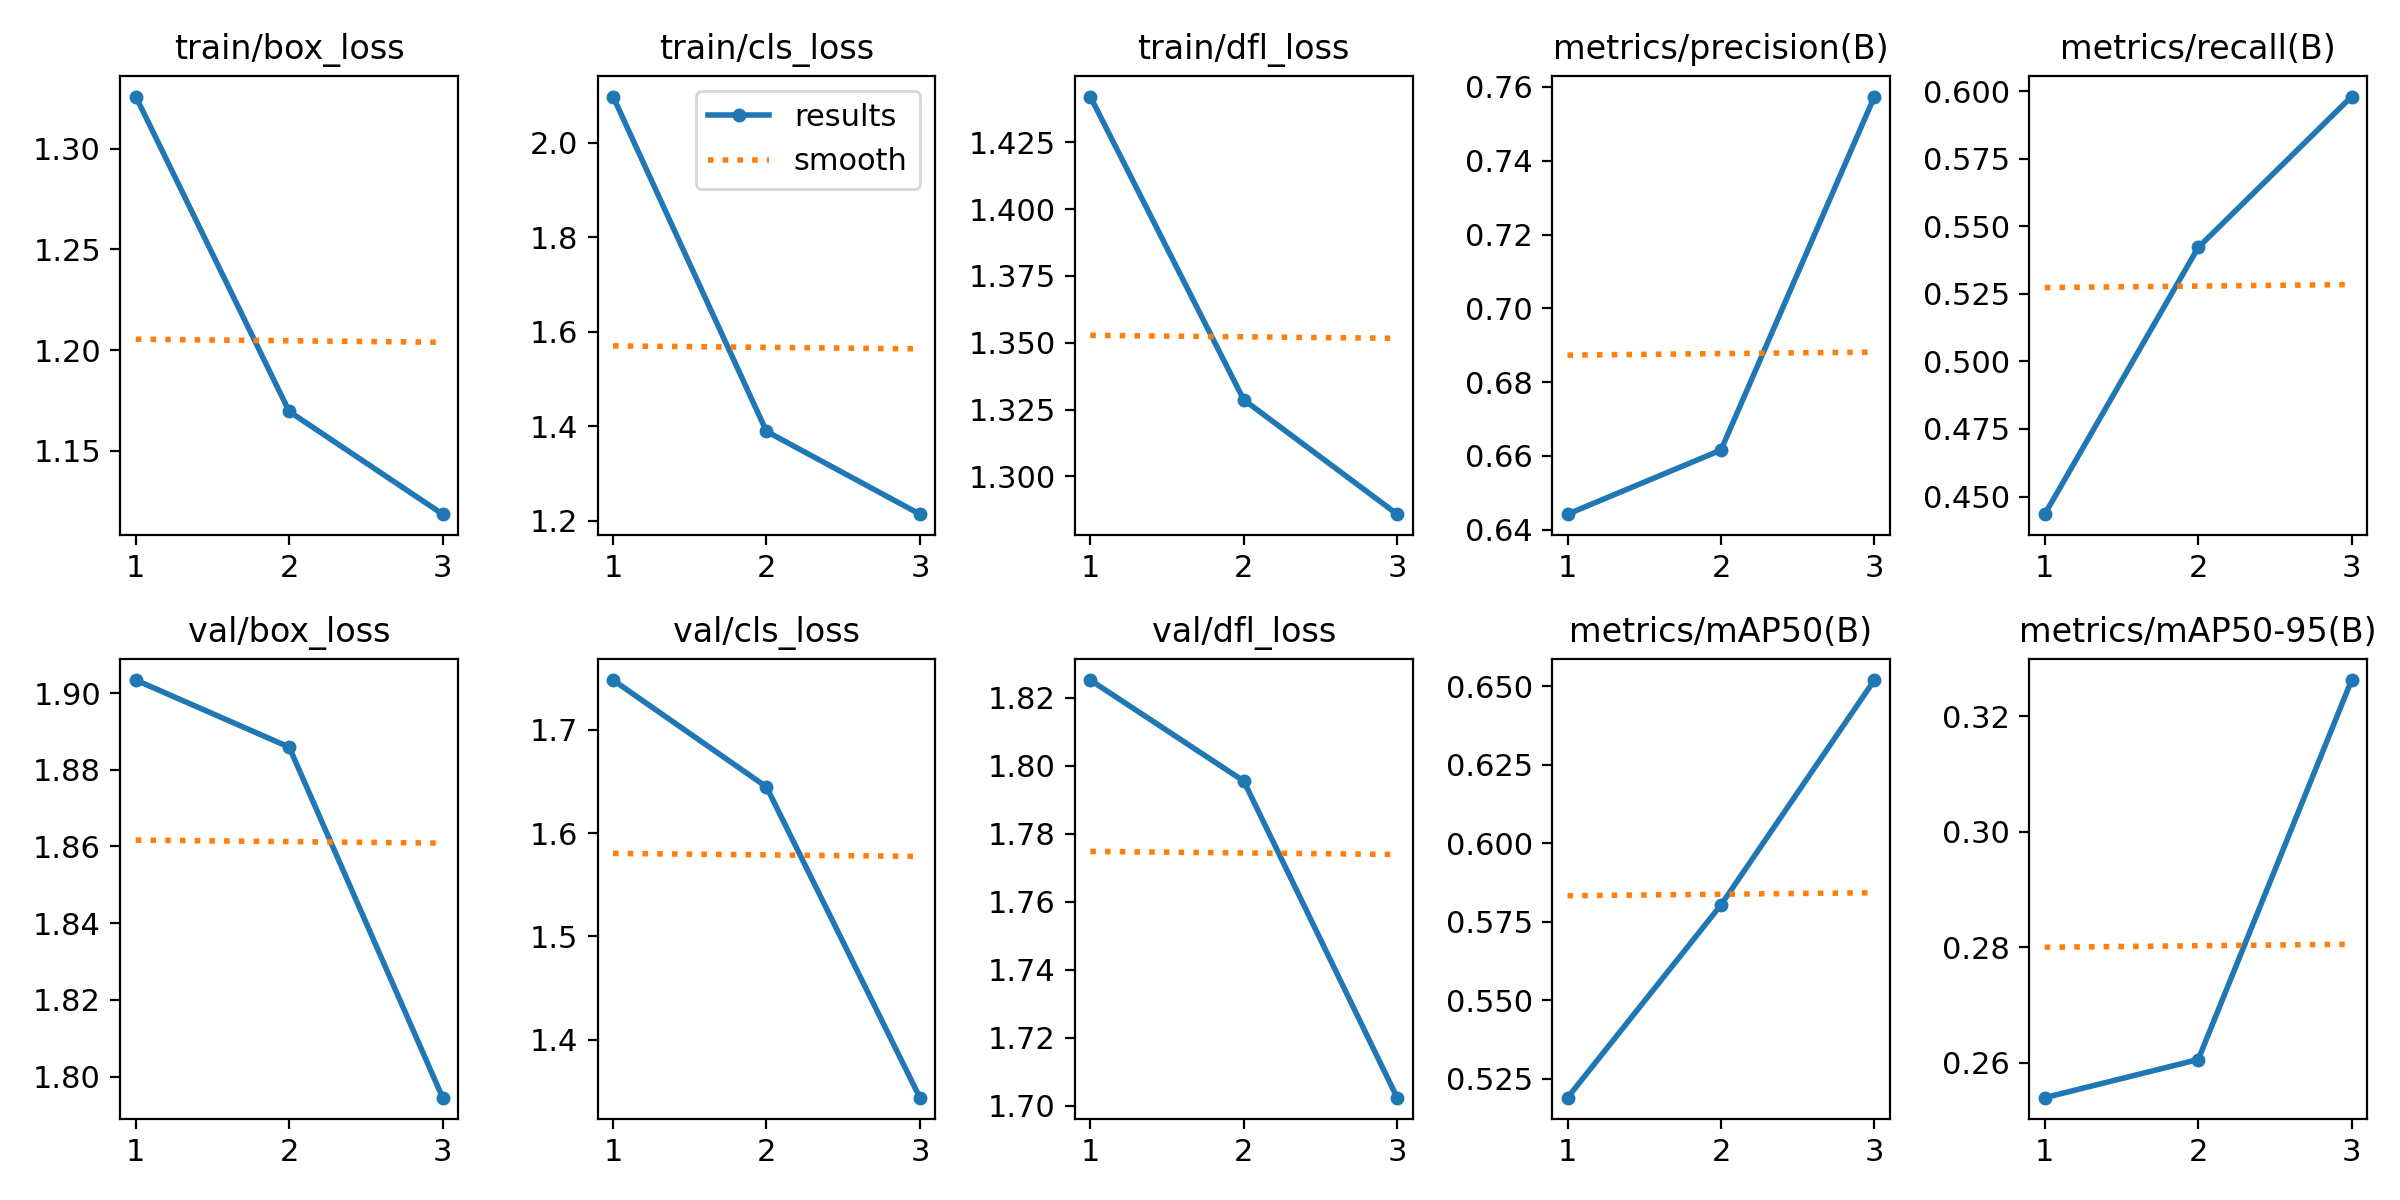

In [10]:
Image(filename='/content/runs/detect/train/results.png', width=600)

In [16]:
# Validate on training data
model.val(data=)

Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=safehat.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

train: Scanning /content/drive/MyDrive/css-data/train/labels.cache... 2605 images, 6 backgrounds, 0 corrupt: 100%|██████████| 2605/2605 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/css-data/train/images/004720_jpg.rf.afc486560a4004c7cfd67910af31a29c.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/css-data/train/images/construction-813-_jpg.rf.b085952261fd98f2e76b8065de149b5f.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/css-data/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.32G      3.458      4.535      4.227        263        640:  19%|█▉        | 31/163 [00:26<01:52,  1.18it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



KeyboardInterrupt: 

In [ ]:
import cv2
from PIL import Image
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")
# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
# results = model.predict(source="0")
# results = model.predict(source="folder", show=True)  # Display preds. Accepts all YOLO predict arguments
model.predict('https://www.youtube.com/watch?v=80x9Fig9YTU',save=True)

流式输出内容被截断，只能显示最后 5000 行内容。
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
0: 384x640 1 Person, 62.7ms
0: 384x640 1 Person, 81.8ms
0: 384x640 1 Person, 73.4ms
0: 384x640 1 Person, 40.2ms
0: 384x640 1 Person, 45.7ms
0: 384x640 1 Person, 15.3ms
0: 384x640 (no detections), 29.3ms
0: 384x640 (no detections), 26.2ms
0: 384x640 (no detections), 18.9ms
0: 384x640 (no detections), 17.9ms
0: 384x640 (no detections), 24.9ms
0: 384x640 (no detections), 39.5ms
0: 384x640 (no detections), 41.1ms
0: 384x640 (no detections), 25.4ms
0: 384x640 (no detections), 18.3ms
0: 384x640 (no detections), 18.4ms
0: 384x640 2 NO-Safety Vests, 2 Persons, 17.3ms
0: 384x640 1 NO-Hardhat, 2 NO-Safety Vests, 2 Persons, 

In [ ]:
# from PIL
im1 = Image.open("bus.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

# from ndarray
im2 = cv2.imread("bus.jpg")
results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# from list of PIL/ndarray
results = model.predict(source=[im1, im2])